# Lab 2 - ENSF 511 - Transfer Learning
### Part 1 - TL Analysis
Name: Joel Aaron Marquez

In [1]:
# Libraries

from PIL import Image
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout,Input, AveragePooling2D, Activation,Conv2D, MaxPooling2D, BatchNormalization,Concatenate
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.math import confusion_matrix
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import pandas as pd
import glob,os
import keras
import seaborn as sns

Using TensorFlow backend.


In [34]:
# Function 1 - to plot confusion Matrix - Credits to Majid

def plot_confusion_matrix(cm, classes, layer_no, tf_type,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    accuracies = [] # obtaining the list of accuracies
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
            
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 
        horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
        if i == j:
            accuracies.append(cm[i, j]) #grabbing the accuracies

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    if tf_type == 'freeze':
        plt.savefig('freeze'+ str(layer_no) + '.png')
    elif tf_type == 'retrain':
        plt.savefig('retrain'+ str(layer_no) + '.png')
    
    return accuracies


In [3]:
# Function 2 - to Add New Layers and Weights when constructing model 

def add_layers(num, model):
    """ function to add new layers with new weights
    input: num -> position of the layer model -> transferred keras.model object
    output: returns keras.model object 
    """
    if num == 0: # Layer 1
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model.add(tf.keras.layers.BatchNormalization()), model.add(tf.keras.layers.MaxPool2D((2, 2))), model.add(tf.keras.layers.Dropout(0.2))
        model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model.add(tf.keras.layers.BatchNormalization()), model.add(tf.keras.layers.MaxPool2D((2, 2))) ,model.add(tf.keras.layers.Dropout(0.3))
        model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model.add(tf.keras.layers.BatchNormalization()), model.add(tf.keras.layers.MaxPool2D((2, 2))), model.add(tf.keras.layers.Dropout(0.4)) 
        model.add(tf.keras.layers.Flatten())
        model.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
        model.add(tf.keras.layers.BatchNormalization()), model.add(tf.keras.layers.Dropout(0.5))
        model.add(tf.keras.layers.Dense(11, activation='softmax')) 
    elif num == 2: # Layer 2  
        model.add(tf.keras.layers.BatchNormalization()), model.add(tf.keras.layers.MaxPool2D((2, 2))), model.add(tf.keras.layers.Dropout(0.2))
        model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model.add(tf.keras.layers.BatchNormalization()), model.add(tf.keras.layers.MaxPool2D((2, 2))) ,model.add(tf.keras.layers.Dropout(0.3))
        model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model.add(tf.keras.layers.BatchNormalization()), model.add(tf.keras.layers.MaxPool2D((2, 2))), model.add(tf.keras.layers.Dropout(0.4)) 
        model.add(tf.keras.layers.Flatten())
        model.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
        model.add(tf.keras.layers.BatchNormalization()), model.add(tf.keras.layers.Dropout(0.5))
        model.add(tf.keras.layers.Dense(11, activation='softmax')) 
    elif num == 6: # Layer 3  
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model.add(tf.keras.layers.BatchNormalization()), model.add(tf.keras.layers.MaxPool2D((2, 2))) ,model.add(tf.keras.layers.Dropout(0.3))
        model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model.add(tf.keras.layers.BatchNormalization()), model.add(tf.keras.layers.MaxPool2D((2, 2))), model.add(tf.keras.layers.Dropout(0.4)) 
        model.add(tf.keras.layers.Flatten())
        model.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
        model.add(tf.keras.layers.BatchNormalization()), model.add(tf.keras.layers.Dropout(0.5))
        model.add(tf.keras.layers.Dense(11, activation='softmax')) 
    elif num == 8: # Layer 4 
        model.add(tf.keras.layers.BatchNormalization()), model.add(tf.keras.layers.MaxPool2D((2, 2))) ,model.add(tf.keras.layers.Dropout(0.3))
        model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model.add(tf.keras.layers.BatchNormalization()), model.add(tf.keras.layers.MaxPool2D((2, 2))), model.add(tf.keras.layers.Dropout(0.4)) 
        model.add(tf.keras.layers.Flatten())
        model.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
        model.add(tf.keras.layers.BatchNormalization()), model.add(tf.keras.layers.Dropout(0.5))
        model.add(tf.keras.layers.Dense(11, activation='softmax')) 
    elif num == 12: # Layer 5  
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
        model.add(tf.keras.layers.BatchNormalization()), model.add(tf.keras.layers.MaxPool2D((2, 2))), model.add(tf.keras.layers.Dropout(0.4)) 
        model.add(tf.keras.layers.Flatten())
        model.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
        model.add(tf.keras.layers.BatchNormalization()), model.add(tf.keras.layers.Dropout(0.5))
        model.add(tf.keras.layers.Dense(11, activation='softmax')) 
    elif num == 14: # Layer 6
        model.add(tf.keras.layers.BatchNormalization()), model.add(tf.keras.layers.MaxPool2D((2, 2))), model.add(tf.keras.layers.Dropout(0.4)) 
        model.add(tf.keras.layers.Flatten())
        model.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
        model.add(tf.keras.layers.BatchNormalization()), model.add(tf.keras.layers.Dropout(0.5))
        model.add(tf.keras.layers.Dense(11, activation='softmax')) 
    elif num == 19: # Layer 7
        model.add(tf.keras.layers.BatchNormalization()), model.add(tf.keras.layers.Dropout(0.5))
        model.add(tf.keras.layers.Dense(11, activation='softmax')) 
        
    return model

### Goal
Evaluate the performance and behavior of transfer learning by transferring the weights of 
layers **{1, 1:2, 1:3, 1:4, 1:5, :1:6, and 1:7}** in the 7 layer model presented. For each case, 
evaluate both the behavior of freezing the weights and the case of transferring with learning (by 
selecting a suitable learning rate).

### 1. Loading Model and Info

In [4]:
#Loading Original Model from Majid
from tensorflow.keras.models import load_model

model_transfered=load_model('C:/Users/User/Desktop/Lab2/model.h5')


In [5]:
# Showing the layers/info of the model
model_transfered.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_28 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_29 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 16, 16, 64)       

In [6]:
# Code Block is creditted to Majid

# Transferring the cifar10 data
(x_train, y_train), (x_test, y_test)=cifar10.load_data()

instances = []

# Load in the images
for filepath in os.listdir('C:/Users/User/Desktop/Lab2/converted-agumented'):  
    image=(Image.open('C:/Users/User/Desktop/Lab2/converted-agumented/'+filepath))
    data=np.asarray(image)
    if data.shape!=(32,32,3): 
        print(filepath)
        continue
    instances.append(data)

bobcats=np.stack(instances, axis=0)
print(bobcats.shape)
bobcat_group=np.arange(len(instances)).reshape(len(instances),1); 
bobcat_group.fill(10)
print(bobcat_group.shape)
x_train=np.concatenate((x_train,bobcats[:5000,:,:,:]),axis=0)
x_test=np.concatenate((x_test,bobcats[5000:,:,:,:]),axis=0)
y_train=np.concatenate((y_train,bobcat_group[:5000]),axis=0)
y_test=np.concatenate((y_test,bobcat_group[5000:]),axis=0)


print('Shape of x_train is {}'.format(x_train.shape))
print('Shape of x_test is {}'.format(x_test.shape))
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))

a= to_categorical(y_train)

print('Shape of y_train after to_categorical is {}'.format(a.shape))
# Normalizing
x_train=x_train/255
x_test=x_test/255

#One hot encoding
y_train_cat=to_categorical(y_train,11)
y_test_cat=to_categorical(y_test,11)

print(y_train_cat.shape)
print(y_test_cat.shape)

(6000, 32, 32, 3)
(6000, 1)
Shape of x_train is (55000, 32, 32, 3)
Shape of x_test is (11000, 32, 32, 3)
Shape of y_train is (55000, 1)
Shape of y_test is (11000, 1)
Shape of y_train after to_categorical is (55000, 11)
(55000, 11)
(11000, 11)


### 3. Creating the models for cases 1 and 2
**Case 1** - Freezing the transferred layers

In [12]:
# Producing the network of different frozen layers

from os import environ
environ["KERAS_BACKEND"] = "plaidml.keras.backend"

models_1 = list()

og_layer_no = [0,2,6,8,12,14,19] # layer positions

# original learning rate = 0.001
# therefore, low layer (1-3) = 0.000001, intermediate layer (4,5) = 0.00001, top layer (6,7) = 0.0001
learning_rate1 = [0.000001,0.000001,0.000001,0.00001,0.00001,0.0001,0.0001] 

for (layer_no, lr_no) in zip(og_layer_no, learning_rate1):

    #producing transferred model
    temp_model = model_transfered #copies the model to another variable to avoid overwriting the original model
    temp_model = tf.keras.Model(inputs=model_transfered.input, outputs=model_transfered.layers[layer_no].output)
    
    #freezing the layers
    for layer in temp_model.layers:
        layer.trainable = False
        
    # adding new layers
    model = tf.keras.Sequential()
    model.add(temp_model)

    new_model = add_layers(layer_no,model)
    
    # compile model
    opt = SGD(learning_rate=lr_no, momentum=0.9)
    new_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # storing to list
    models_1.append(new_model) 
    
for model in models_1:
    model.summary()


Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_22 (Functional)        (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_84 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_85 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_57 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 16, 16, 64)      



Training model that starts after frozen layer: 1
Epoch 1/50
1719/1719 [==============================] - 235s 136ms/step - loss: 1.5453 - accuracy: 0.4749 - val_loss: 1.0108 - val_accuracy: 0.6453
Epoch 2/50
1719/1719 [==============================] - 236s 137ms/step - loss: 0.9784 - accuracy: 0.6639 - val_loss: 0.7564 - val_accuracy: 0.7370
Epoch 3/50
1719/1719 [==============================] - 236s 137ms/step - loss: 0.8062 - accuracy: 0.7256 - val_loss: 0.6500 - val_accuracy: 0.7757
Epoch 4/50
1719/1719 [==============================] - 237s 138ms/step - loss: 0.7153 - accuracy: 0.7575 - val_loss: 0.6339 - val_accuracy: 0.7865
Epoch 5/50
1719/1719 [==============================] - 229s 133ms/step - loss: 0.6496 - accuracy: 0.7802 - val_loss: 0.5655 - val_accuracy: 0.8048
Epoch 6/50
1719/1719 [==============================] - 235s 137ms/step - loss: 0.5956 - accuracy: 0.7991 - val_loss: 0.5147 - val_accuracy: 0.8231
Epoch 7/50
1719/1719 [==============================] - 236s 

1719/1719 [==============================] - 154s 89ms/step - loss: 0.4213 - accuracy: 0.8586 - val_loss: 0.4291 - val_accuracy: 0.8584
Epoch 10/50
1719/1719 [==============================] - 153s 89ms/step - loss: 0.4001 - accuracy: 0.8638 - val_loss: 0.4257 - val_accuracy: 0.8633
Epoch 11/50
1719/1719 [==============================] - 153s 89ms/step - loss: 0.3839 - accuracy: 0.8711 - val_loss: 0.4261 - val_accuracy: 0.8631
Epoch 12/50
1719/1719 [==============================] - 154s 90ms/step - loss: 0.3735 - accuracy: 0.8737 - val_loss: 0.4242 - val_accuracy: 0.8605
Epoch 13/50
1719/1719 [==============================] - 154s 90ms/step - loss: 0.3603 - accuracy: 0.8782 - val_loss: 0.4087 - val_accuracy: 0.8649
Epoch 14/50
1719/1719 [==============================] - 154s 90ms/step - loss: 0.3501 - accuracy: 0.8810 - val_loss: 0.4013 - val_accuracy: 0.8671
Epoch 15/50
1719/1719 [==============================] - 154s 89ms/step - loss: 0.3373 - accuracy: 0.8843 - val_loss: 0.3976

1719/1719 [==============================] - 112s 65ms/step - loss: 0.2644 - accuracy: 0.9098 - val_loss: 0.4392 - val_accuracy: 0.8671
Epoch 20/50
1719/1719 [==============================] - 112s 65ms/step - loss: 0.2654 - accuracy: 0.9088 - val_loss: 0.4487 - val_accuracy: 0.8658
Epoch 21/50
1719/1719 [==============================] - 112s 65ms/step - loss: 0.2586 - accuracy: 0.9102 - val_loss: 0.4615 - val_accuracy: 0.8629
Epoch 22/50
1719/1719 [==============================] - 112s 65ms/step - loss: 0.2554 - accuracy: 0.9127 - val_loss: 0.4483 - val_accuracy: 0.8657
Epoch 23/50
1719/1719 [==============================] - 112s 65ms/step - loss: 0.2532 - accuracy: 0.9135 - val_loss: 0.4340 - val_accuracy: 0.8666
Epoch 24/50
1719/1719 [==============================] - 112s 65ms/step - loss: 0.2462 - accuracy: 0.9156 - val_loss: 0.4637 - val_accuracy: 0.8640
Epoch 25/50
1719/1719 [==============================] - 112s 65ms/step - loss: 0.2439 - accuracy: 0.9165 - val_loss: 0.4463

1719/1719 [==============================] - 80s 47ms/step - loss: 0.3317 - accuracy: 0.8808 - val_loss: 0.5707 - val_accuracy: 0.8205
Epoch 30/50
1719/1719 [==============================] - 80s 47ms/step - loss: 0.3371 - accuracy: 0.8797 - val_loss: 0.5591 - val_accuracy: 0.8202
Epoch 31/50
1719/1719 [==============================] - 80s 47ms/step - loss: 0.3332 - accuracy: 0.8810 - val_loss: 0.5633 - val_accuracy: 0.8202
Epoch 32/50
1719/1719 [==============================] - 80s 47ms/step - loss: 0.3277 - accuracy: 0.8805 - val_loss: 0.5561 - val_accuracy: 0.8243
Epoch 33/50
1719/1719 [==============================] - 80s 47ms/step - loss: 0.3311 - accuracy: 0.8791 - val_loss: 0.5564 - val_accuracy: 0.8248
Epoch 34/50
1719/1719 [==============================] - 80s 47ms/step - loss: 0.3311 - accuracy: 0.8806 - val_loss: 0.5728 - val_accuracy: 0.8170
Epoch 35/50
1719/1719 [==============================] - 80s 47ms/step - loss: 0.3292 - accuracy: 0.8818 - val_loss: 0.5560 - val_

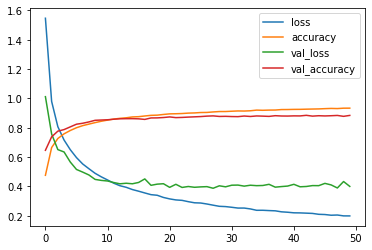

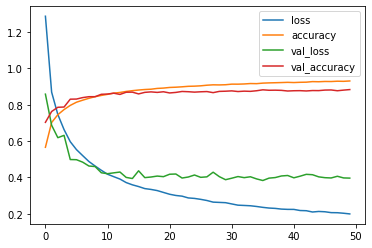

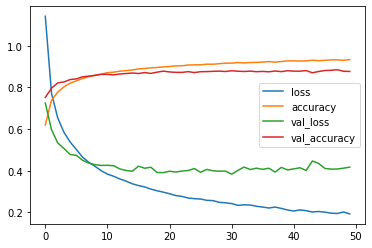

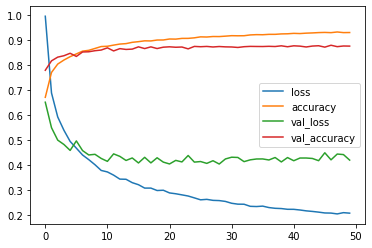

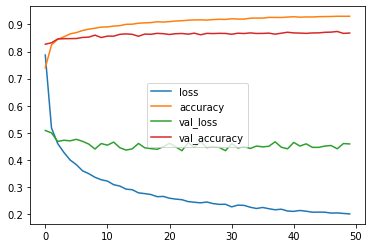

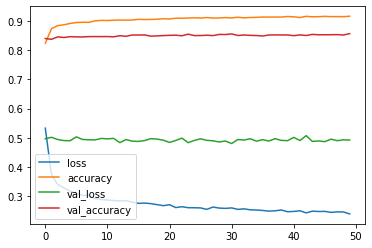

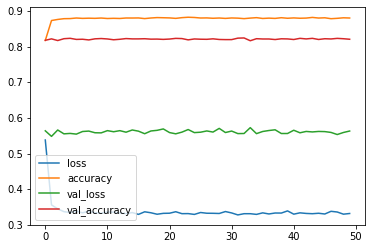

In [8]:
# Training/Compiling and exporting the models
from os import environ
environ["KERAS_BACKEND"] = "plaidml.keras.backend"

count = 1 # counts the layer transferred

for model in models_1:
    
    print("\n\nTraining model that starts after frozen layer: " + str(count))
    
    # Training the model
    history = model.fit(x_train,y_train_cat,epochs=50,validation_data=(x_test,y_test_cat))
    
    # Showing the Accuracy and Loss VS #epochs
    plot = pd.DataFrame(history.history).plot()
    fig = plot.get_figure()
    fig.savefig('C:/Users/User/Desktop/model_freeze_layer' + str(count) + '.png')
    
    # exporting the model
    model.save('C:/Users/User/Desktop/model_freeze_layer' + str(count) +'.h5')
    
    count += 1 # goes to next layer


**Case #2** - Retraining the transferred layers

In [15]:
#Producing the model of different retraining layers

models_2 = list()
learning_rate2 = [0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001] # same learning rate

for (layer_no, lr_no) in zip(og_layer_no, learning_rate2):

    #producing transferred model
    temp_model = model_transfered #copies the model to another variable to avoid overwriting the original model
    temp_model = tf.keras.Model(inputs=model_transfered.input, outputs=model_transfered.layers[layer_no].output)
    
    #freezing the layers
    for layer in temp_model.layers:
        layer.trainable = True
        
    # adding new layers
    model = tf.keras.Sequential()
    model.add(temp_model)

    new_model = add_layers(layer_no,model)
    new_model.summary()
    
    # compile model
    opt = SGD(learning_rate=lr_no, momentum=0.9)
    new_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # storing to list
    models_2.append(new_model)

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_43 (Functional)        (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_168 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_169 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_72 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_114 (Dropout)        (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 16, 16, 64)      

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_46 (Functional)        (None, 16, 16, 64)        66080     
_________________________________________________________________
batch_normalization_186 (Bat (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_80 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_125 (Dropout)        (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 8, 8, 128)         73856     
_________________________________________________________________
batch_normalization_187 (Bat (None, 8, 8, 128)         512       
_________________________________________________________________
conv2d_103 (Conv2D)          (None, 8, 8, 128)       



Training model that starts after frozen layer : 1
Epoch 1/50
1719/1719 [==============================] - 253s 146ms/step - loss: 1.5196 - accuracy: 0.4860 - val_loss: 0.9688 - val_accuracy: 0.6645
Epoch 2/50
1719/1719 [==============================] - 258s 150ms/step - loss: 0.9651 - accuracy: 0.6686 - val_loss: 0.7660 - val_accuracy: 0.7330
Epoch 3/50
1719/1719 [==============================] - 237s 138ms/step - loss: 0.8014 - accuracy: 0.7267 - val_loss: 0.6945 - val_accuracy: 0.7585
Epoch 4/50
1719/1719 [==============================] - 238s 139ms/step - loss: 0.7066 - accuracy: 0.7611 - val_loss: 0.5905 - val_accuracy: 0.7978
Epoch 5/50
1719/1719 [==============================] - 238s 139ms/step - loss: 0.6438 - accuracy: 0.7809 - val_loss: 0.5863 - val_accuracy: 0.8037
Epoch 6/50
1719/1719 [==============================] - 238s 138ms/step - loss: 0.5859 - accuracy: 0.8010 - val_loss: 0.4881 - val_accuracy: 0.8353
Epoch 7/50
1719/1719 [==============================] - 238s

Epoch 10/50
1719/1719 [==============================] - 231s 134ms/step - loss: 0.3781 - accuracy: 0.8701 - val_loss: 0.3968 - val_accuracy: 0.8693
Epoch 11/50
1719/1719 [==============================] - 230s 134ms/step - loss: 0.3648 - accuracy: 0.8764 - val_loss: 0.4067 - val_accuracy: 0.8697
Epoch 12/50
1719/1719 [==============================] - 230s 134ms/step - loss: 0.3510 - accuracy: 0.8822 - val_loss: 0.3889 - val_accuracy: 0.8752
Epoch 13/50
1719/1719 [==============================] - 230s 134ms/step - loss: 0.3353 - accuracy: 0.8883 - val_loss: 0.3946 - val_accuracy: 0.8732
Epoch 14/50
1719/1719 [==============================] - 230s 134ms/step - loss: 0.3271 - accuracy: 0.8898 - val_loss: 0.4067 - val_accuracy: 0.8712
Epoch 15/50
1719/1719 [==============================] - 230s 134ms/step - loss: 0.3137 - accuracy: 0.8930 - val_loss: 0.3851 - val_accuracy: 0.8766
Epoch 16/50
1719/1719 [==============================] - 230s 134ms/step - loss: 0.3089 - accuracy: 0.8943

Epoch 15/50
1719/1719 [==============================] - 233s 135ms/step - loss: 0.2809 - accuracy: 0.9056 - val_loss: 0.4029 - val_accuracy: 0.8744
Epoch 16/50
1719/1719 [==============================] - 232s 135ms/step - loss: 0.2734 - accuracy: 0.9068 - val_loss: 0.3949 - val_accuracy: 0.8764
Epoch 17/50
1719/1719 [==============================] - 232s 135ms/step - loss: 0.2647 - accuracy: 0.9096 - val_loss: 0.3891 - val_accuracy: 0.8819
Epoch 18/50
1719/1719 [==============================] - 232s 135ms/step - loss: 0.2619 - accuracy: 0.9111 - val_loss: 0.3802 - val_accuracy: 0.8835
Epoch 19/50
1719/1719 [==============================] - 232s 135ms/step - loss: 0.2544 - accuracy: 0.9142 - val_loss: 0.3952 - val_accuracy: 0.8803
Epoch 20/50
1719/1719 [==============================] - 232s 135ms/step - loss: 0.2508 - accuracy: 0.9130 - val_loss: 0.3699 - val_accuracy: 0.8850
Epoch 21/50
1719/1719 [==============================] - 232s 135ms/step - loss: 0.2426 - accuracy: 0.9183

Epoch 20/50
1719/1719 [==============================] - 239s 139ms/step - loss: 0.1974 - accuracy: 0.9335 - val_loss: 0.3764 - val_accuracy: 0.8885
Epoch 21/50
1719/1719 [==============================] - 239s 139ms/step - loss: 0.1936 - accuracy: 0.9331 - val_loss: 0.3757 - val_accuracy: 0.8896
Epoch 22/50
1719/1719 [==============================] - 238s 139ms/step - loss: 0.1902 - accuracy: 0.9359 - val_loss: 0.3915 - val_accuracy: 0.8873
Epoch 23/50
1719/1719 [==============================] - 238s 138ms/step - loss: 0.1889 - accuracy: 0.9361 - val_loss: 0.3801 - val_accuracy: 0.8871
Epoch 24/50
1719/1719 [==============================] - 239s 139ms/step - loss: 0.1818 - accuracy: 0.9380 - val_loss: 0.3824 - val_accuracy: 0.8920
Epoch 25/50
1719/1719 [==============================] - 239s 139ms/step - loss: 0.1831 - accuracy: 0.9369 - val_loss: 0.4146 - val_accuracy: 0.8857
Epoch 26/50
1719/1719 [==============================] - 239s 139ms/step - loss: 0.1763 - accuracy: 0.9400

Epoch 25/50
1719/1719 [==============================] - 230s 134ms/step - loss: 0.1442 - accuracy: 0.9501 - val_loss: 0.3883 - val_accuracy: 0.8900
Epoch 26/50
1719/1719 [==============================] - 230s 134ms/step - loss: 0.1443 - accuracy: 0.9509 - val_loss: 0.3916 - val_accuracy: 0.8901
Epoch 27/50
1719/1719 [==============================] - 229s 133ms/step - loss: 0.1379 - accuracy: 0.9524 - val_loss: 0.3817 - val_accuracy: 0.8924
Epoch 28/50
1719/1719 [==============================] - 229s 133ms/step - loss: 0.1406 - accuracy: 0.9516 - val_loss: 0.4083 - val_accuracy: 0.8882
Epoch 29/50
1719/1719 [==============================] - 230s 134ms/step - loss: 0.1335 - accuracy: 0.9550 - val_loss: 0.3992 - val_accuracy: 0.8939
Epoch 30/50
1719/1719 [==============================] - 230s 134ms/step - loss: 0.1366 - accuracy: 0.9520 - val_loss: 0.3980 - val_accuracy: 0.8916
Epoch 31/50
1719/1719 [==============================] - 230s 134ms/step - loss: 0.1385 - accuracy: 0.9523

Epoch 30/50
1719/1719 [==============================] - 230s 134ms/step - loss: 0.1086 - accuracy: 0.9635 - val_loss: 0.4124 - val_accuracy: 0.8945
Epoch 31/50
1719/1719 [==============================] - 229s 133ms/step - loss: 0.1034 - accuracy: 0.9645 - val_loss: 0.4068 - val_accuracy: 0.8965
Epoch 32/50
1719/1719 [==============================] - 229s 133ms/step - loss: 0.1033 - accuracy: 0.9651 - val_loss: 0.4539 - val_accuracy: 0.8877
Epoch 33/50
1719/1719 [==============================] - 230s 134ms/step - loss: 0.1044 - accuracy: 0.9645 - val_loss: 0.4030 - val_accuracy: 0.8955
Epoch 34/50
1719/1719 [==============================] - 231s 134ms/step - loss: 0.1024 - accuracy: 0.9648 - val_loss: 0.4077 - val_accuracy: 0.8965
Epoch 35/50
1719/1719 [==============================] - 230s 134ms/step - loss: 0.0980 - accuracy: 0.9663 - val_loss: 0.4310 - val_accuracy: 0.8941
Epoch 36/50
1719/1719 [==============================] - 230s 134ms/step - loss: 0.1011 - accuracy: 0.9654

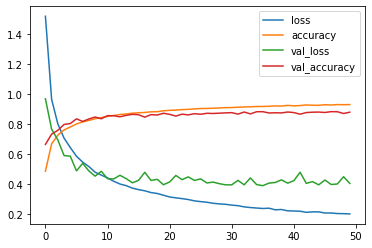

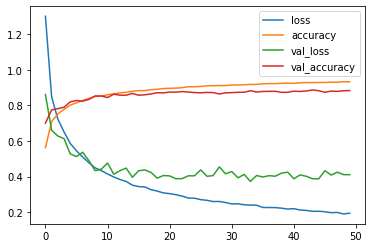

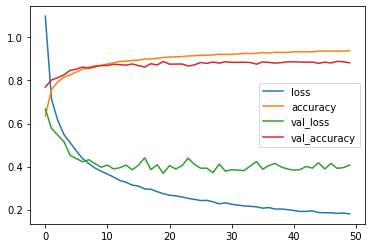

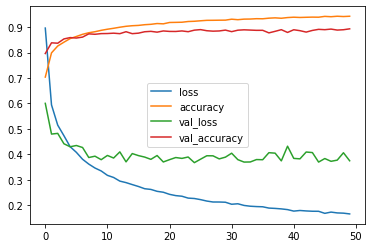

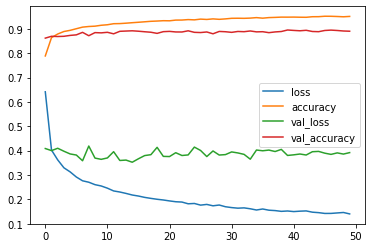

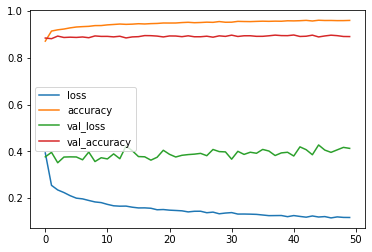

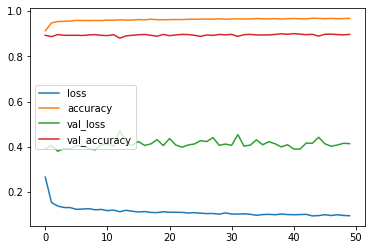

In [16]:
# Training/Compiling and exporting the models

count = 1 # counts the layer transferred

for model in models_2:
    
    print("\n\nTraining model that starts after retrained layer : " + str(count))
    
    # Training the model
    history = model.fit(x_train,y_train_cat,epochs=50,validation_data=(x_test,y_test_cat))
    
    # Showing the Accuracy and Loss VS #epochs
    plot = pd.DataFrame(history.history).plot()
    fig = plot.get_figure()
    fig.savefig('C:/Users/User/Desktop/model_retrain_layer' + str(count) + '.png')
    
    # exporting the model
    model.save('C:/Users/User/Desktop/model_retrain_layer' + str(count) +'.h5')
    
    count += 1 # goes to next layer

### 4. Results

#### 4.1 - Confusion Matrix

Layer 1 - Frozen
Normalized confusion matrix


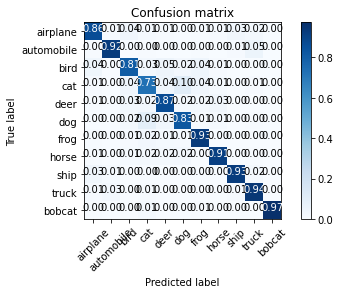

Layer 2 - Frozen
Normalized confusion matrix


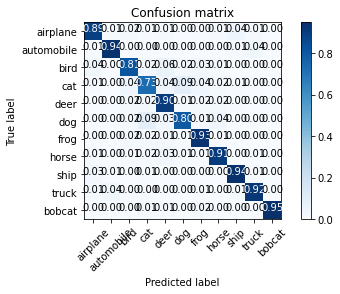

Layer 3 - Frozen
Normalized confusion matrix


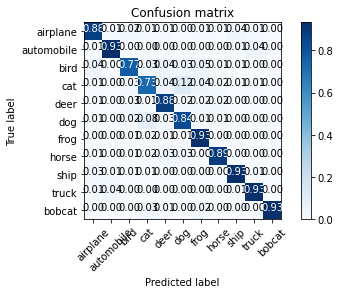

Layer 4 - Frozen
Normalized confusion matrix


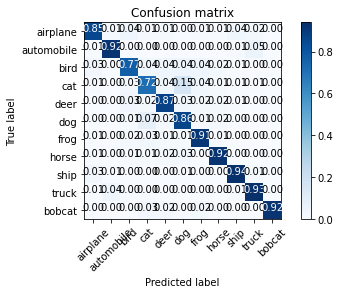

Layer 5 - Frozen
Normalized confusion matrix


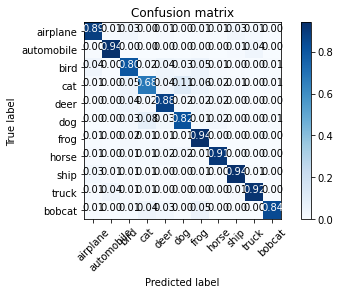

Layer 6 - Frozen
Normalized confusion matrix


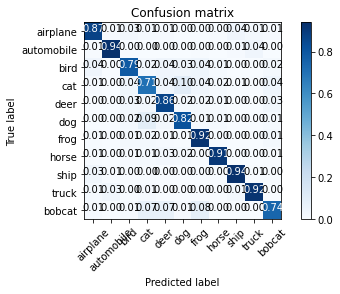

Layer 7 - Frozen
Normalized confusion matrix


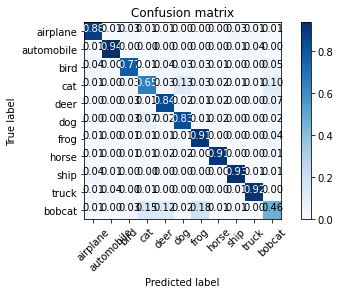

Layer 1 - Retrain
Normalized confusion matrix


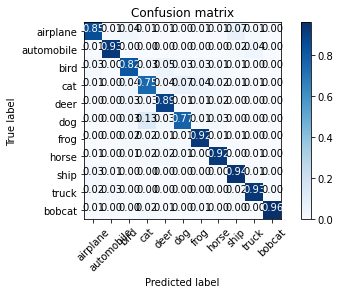

Layer 2 - Retrain
Normalized confusion matrix


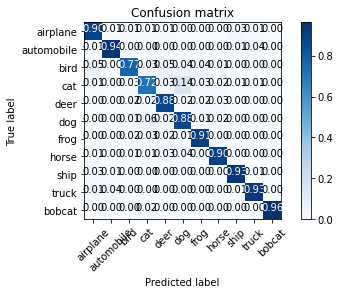

Layer 3 - Retrain
Normalized confusion matrix


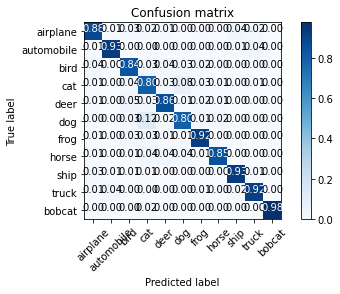

Layer 4 - Retrain
Normalized confusion matrix


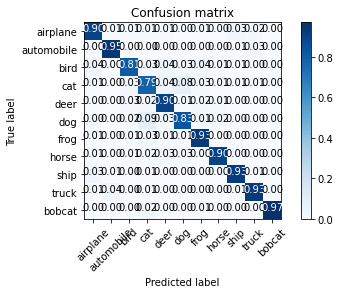

Layer 5 - Retrain
Normalized confusion matrix


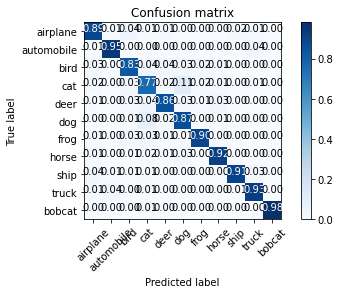

Layer 6 - Retrain
Normalized confusion matrix


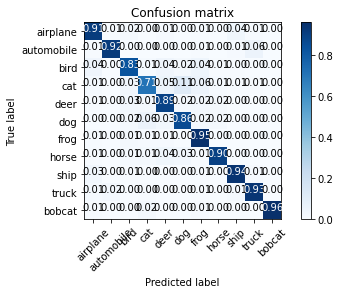

Layer 7 - Retrain
Normalized confusion matrix


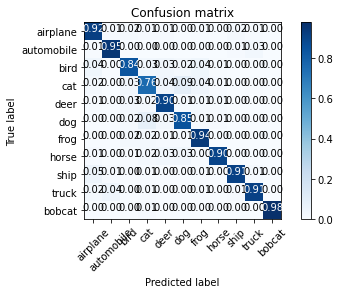

<Figure size 432x288 with 0 Axes>

In [40]:
accuraccy_label_freeze = list()
accuraccy_label_retrain = list()

# Freeze
for layer in range(7):
    
    print("Layer " + str(layer+1) + " - Frozen")
    tf_freeze_model=load_model('C:/Users/User/Desktop/model_freeze_layer' + str(layer+1) +'.h5')
    p_test = tf_freeze_model.predict(x_test).argmax(axis=1)
    cm = confusion_matrix(y_test, p_test)
    accuracy_label = plot_confusion_matrix(cm , ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck','bobcat'], layer+1, "freeze", normalize=True)
    accuraccy_label_freeze.append(accuracy_label) # getting accuracies for each label

# Retrain
for layer in range(7):
    print("Layer " + str(layer+1) + " - Retrain")
    tf_retrain_model=load_model('C:/Users/User/Desktop/model_retrain_layer' + str(layer+1) +'.h5')
    p_test = tf_retrain_model.predict(x_test).argmax(axis=1)
    cm = confusion_matrix(y_test, p_test)
    accuracy_label = plot_confusion_matrix(cm , ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck','bobcat'], layer+1, "retrain", normalize=True, )
    accuraccy_label_retrain.append(accuracy_label) # getting accuracies for each label

#### 4.2 - Accuracy and Loss VS #epochs


Layer 1 - Frozen


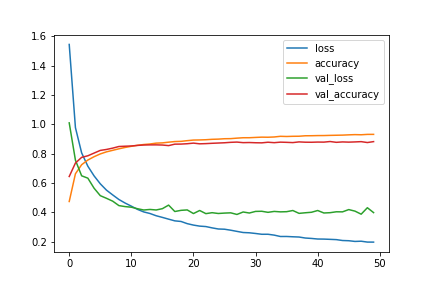


Layer 2 - Frozen


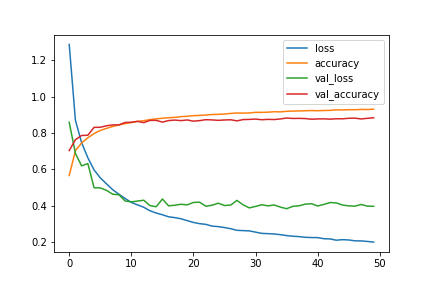


Layer 3 - Frozen


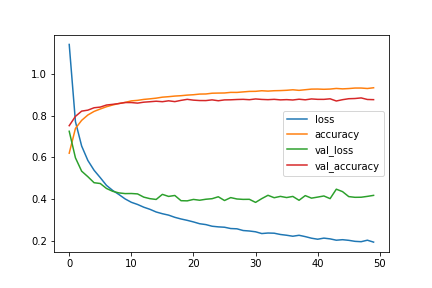


Layer 4 - Frozen


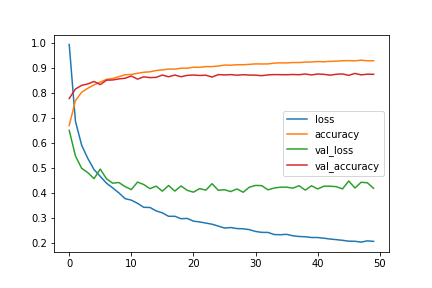


Layer 5 - Frozen


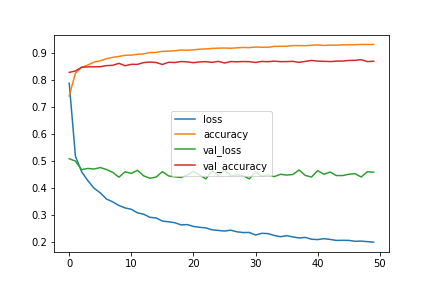


Layer 6 - Frozen


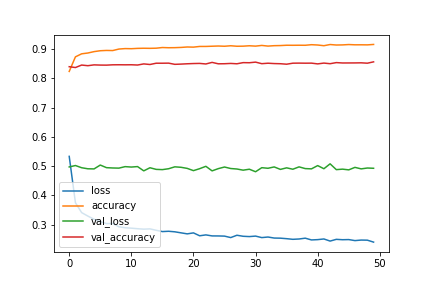


Layer 7 - Frozen


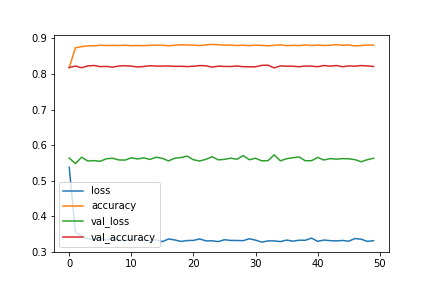


Layer 1 - Retrain


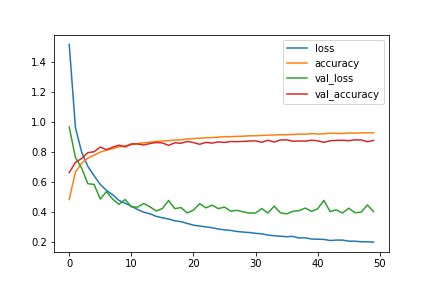


Layer 2 - Retrain


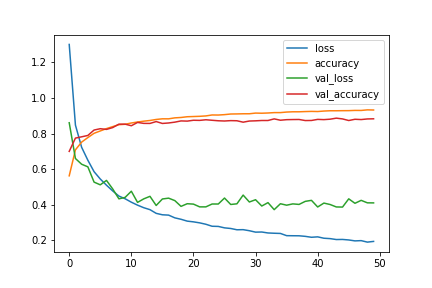


Layer 3 - Retrain


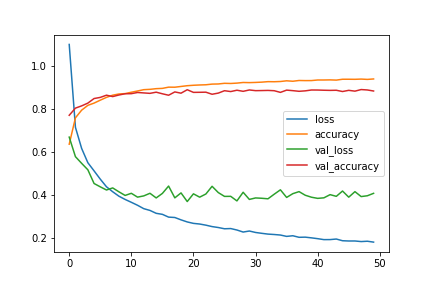


Layer 4 - Retrain


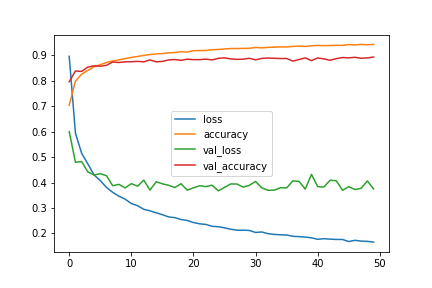


Layer 5 - Retrain


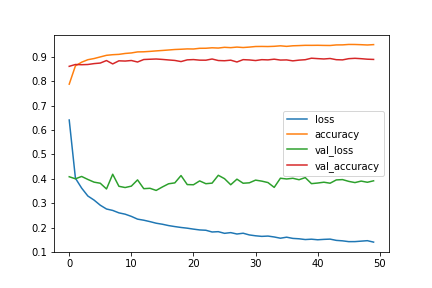


Layer 6 - Retrain


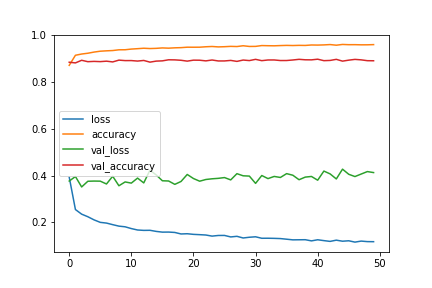


Layer 7 - Retrain


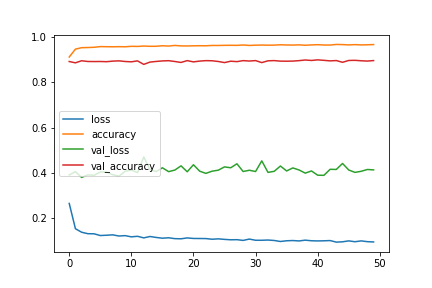

In [30]:
# Freeze
for layer in range(7):
    print("\nLayer " + str(layer+1) + " - Frozen")
    with Image.open('C:/Users/User/Desktop/model_freeze_layer' + str(layer+1) +'.png') as im:
        display(im)
        
# Retrain
for layer in range(7):        
    print("\nLayer " + str(layer+1) + " - Retrain")
    with Image.open('C:/Users/User/Desktop/model_retrain_layer' + str(layer+1) +'.png') as im:
        display(im)

#### 4.3 Overall Test Accuracy, Bobcat, Cat vs Layer Transferred

In [55]:
# Freeze
counter = 1
cat_acc_fz = list()
bobcat_acc_fz = list()
ov_test_acc_fz = list()

for acc_fr in accuraccy_label_freeze:
    
    print("Layer " + str(counter) + " - Frozen\n")
    tf_freeze_model=load_model('C:/Users/User/Desktop/model_freeze_layer' + str(counter) +'.h5')
    evaluation_freeze = tf_freeze_model.evaluate(x_test, y_test_cat)[1] # Obtains the test accuracy
    ov_test_acc_fz.append(evaluation_freeze)
    cat_acc_fz.append(acc_fr[3])
    bobcat_acc_fz.append(acc_fr[-1])
    
    print('Test Accuracy: {}'.format(evaluation_freeze))
    print("Cat Accuracy: {}".format(acc_fr[3]))
    print("Bobcat Accuracy: {}\n".format(acc_fr[-1]))
    counter += 1

# Retrain
counter = 1
cat_acc_re = list()
bobcat_acc_re = list()
ov_test_acc_re = list()

for acc_re in accuraccy_label_retrain:
    
    print("Layer " + str(counter) + " - Retrain\n")
    tf_retrain_model=load_model('C:/Users/User/Desktop/model_retrain_layer' + str(counter) +'.h5')
    evaluation_freeze = tf_retrain_model.evaluate(x_test, y_test_cat)[1] # Obtains the test accuracy
    ov_test_acc_re.append(evaluation_freeze)
    cat_acc_re.append(acc_re[3])
    bobcat_acc_re.append(acc_re[-1])
    
    print('Test Accuracy: {}'.format(evaluation_freeze))
    print("Cat Accuracy: {}".format(acc_re[3]))
    print("Bobcat Accuracy: {}\n".format(acc_re[-1]))
    counter += 1

Layer 1 - Frozen

344/344 [==============================] - 14s 40ms/step - loss: 0.3991 - accuracy: 0.8830
Test Accuracy: 0.8830000162124634
Cat Accuracy: 0.733
Bobcat Accuracy: 0.973

Layer 2 - Frozen

344/344 [==============================] - 14s 40ms/step - loss: 0.3962 - accuracy: 0.8838
Test Accuracy: 0.8838182091712952
Cat Accuracy: 0.733
Bobcat Accuracy: 0.948

Layer 3 - Frozen

344/344 [==============================] - 15s 44ms/step - loss: 0.4172 - accuracy: 0.8771
Test Accuracy: 0.8770909309387207
Cat Accuracy: 0.73
Bobcat Accuracy: 0.932

Layer 4 - Frozen

344/344 [==============================] - 15s 41ms/step - loss: 0.4184 - accuracy: 0.8744
Test Accuracy: 0.8743636608123779
Cat Accuracy: 0.716
Bobcat Accuracy: 0.92

Layer 5 - Frozen

344/344 [==============================] - 16s 45ms/step - loss: 0.4590 - accuracy: 0.8683
Test Accuracy: 0.8682727217674255
Cat Accuracy: 0.679
Bobcat Accuracy: 0.844

Layer 6 - Frozen

344/344 [==============================] - 14s 39

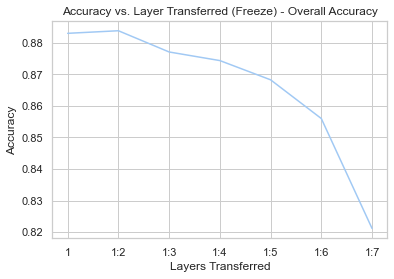

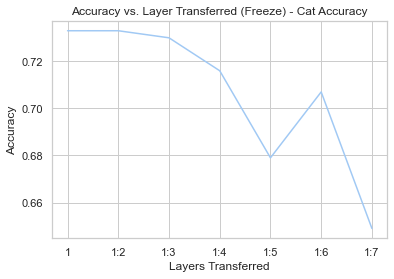

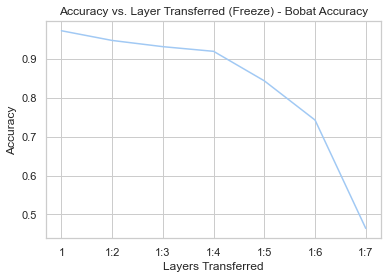

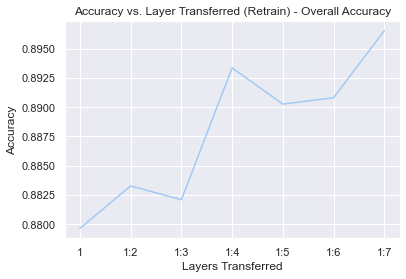

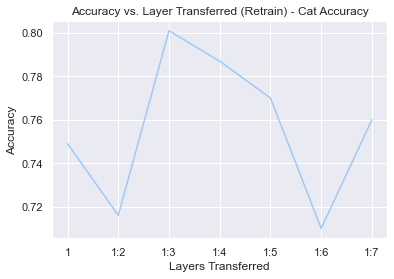

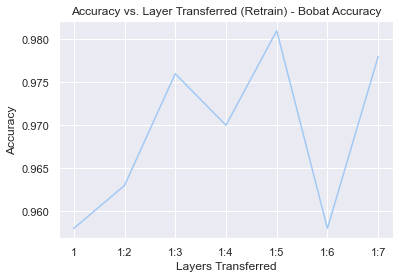

In [74]:
# Plotting the Graphs

tf_layer = ['1', '1:2', '1:3', '1:4', '1:5', '1:6', '1:7']
sns.set_theme(style="whitegrid", palette="pastel")

# Freeze
sns.lineplot(x = tf_layer, y = ov_test_acc_fz).set(title='Accuracy vs. Layer Transferred (Freeze) - Overall Accuracy',
                                        xlabel = "Layers Transferred",
                                        ylabel = "Accuracy")
plt.show()

sns.lineplot(x = tf_layer, y = cat_acc_fz).set(title='Accuracy vs. Layer Transferred (Freeze) - Cat Accuracy',
                                        xlabel = "Layers Transferred",
                                        ylabel = "Accuracy")
plt.show()

sns.lineplot(x = tf_layer, y = bobcat_acc_fz).set(title='Accuracy vs. Layer Transferred (Freeze) - Bobat Accuracy',
                                        xlabel = "Layers Transferred",
                                        ylabel = "Accuracy")
plt.show()

# Retrain
sns.set_theme(style="darkgrid", palette="pastel")

sns.lineplot(x = tf_layer, y = ov_test_acc_re).set(title='Accuracy vs. Layer Transferred (Retrain) - Overall Accuracy',
                                        xlabel = "Layers Transferred",
                                        ylabel = "Accuracy")
plt.show()

sns.lineplot(x = tf_layer, y = cat_acc_re).set(title='Accuracy vs. Layer Transferred (Retrain) - Cat Accuracy',
                                        xlabel = "Layers Transferred",
                                        ylabel = "Accuracy")
plt.show()

sns.lineplot(x = tf_layer, y = bobcat_acc_re).set(title='Accuracy vs. Layer Transferred (Retrain) - Bobat Accuracy',
                                        xlabel = "Layers Transferred",
                                        ylabel = "Accuracy")
plt.show()

### Discussions

**Case 1** - Freezing the transferred layers

Looking at the confusion matrices, transfering the frozen layers have a **trend of decreasing the accuracies** for both cat and bobcat (and the rest as well). The first forzen layer that was transferred had a cat and bobcat accuracy of **0.733** and **0.973** respectively. It continued a general trend of decreasing accuracy until it had a cat and bobcat accuracy of **0.649** and **0.464** respectively at the last layer. As expected, **the model cannot completely distinguish between cat and bobcat**.

The accuracy and loss vs #epochs graphs also tell a similar story with overall accuracy decreasing. It starts from **88.3%** at the first layer into **82.1%** at the last layer. It worth noting that the initial loss is lower when increasing the forzen transferred layers given that the weights are frozen at the first few layers. The validation loss and accuracy also seem to 'straighten' out as layers increase. This could indicate that the **validation set already is familiar with the original model** and higher transfer layers are not different from the former.

The accuracies vs layer transferred graphs again confirm the similar trend stated from the other results.

**This finding seems to follow the trend of the selfer network A3B on Figure 2 from the experiment conducted by Yosinki.**

**Case 2** - Retraining the transferred layers

From the confusion matrices, retraining the layers **does not appear to have a distinct pattern** as we increase the transferred layers. However, it is a little difficult to get a picture of what is going on with the confusion matrices.

As for accuracy and loss vs #epochs, the general behaviour of each trend is similar to freezing the transferred layers. The only diference is that the **overall accurracy** is improving as we increase the transferred layers (from **88.0%** to **89.7%**).

The most interesting finding from this case are the accuracies vs layer transferred graphs. Only the overall accuracy shows a slow steady increase, whereas both the cat and bobcat looks like it decreases in the intermediate layers before recovering at the last layer. The **uncondifent patterns could be attributed to the improper learning rate** for each layer transferred.

**Either way, this finding seems to follow the trend of the selfer network A3B+ on Figure 2 for overall accuracy. But the cat and bobcat accuracy oddly follows the selffer B3B trend, suggesting that there is some fragile co-adaptation on the intermediate layers.** 